
#### *IMPORTING THE REQUIRED LIBRARY*


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt
%matplotlib inline

####
#### *LOAD DATA*
####

In [2]:
data = pd.read_csv("/Users/geethika/Desktop/heart.csv")
data.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


####
#### *NORMALIZE THE DATA*
####

In [3]:
df_norm = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
278,0.604167,0.0,0.333333,0.396226,0.440639,1.0,0.0,0.618321,0.0,0.000000,1.0,0.50,0.666667
39,0.750000,0.0,0.666667,0.622642,0.534247,0.0,0.0,0.610687,0.0,0.129032,1.0,0.00,0.666667
137,0.687500,1.0,0.333333,0.320755,0.187215,1.0,0.0,0.526718,0.0,0.000000,1.0,0.00,0.666667
45,0.479167,1.0,0.333333,0.245283,0.454338,0.0,0.5,0.770992,0.0,0.032258,1.0,0.00,0.666667
209,0.625000,1.0,0.000000,0.433962,0.116438,0.0,0.5,0.694656,1.0,0.000000,1.0,0.25,1.000000


In [4]:
df = pd.concat([df_norm, data.target], axis=1)
df.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
256,0.604167,1.0,0.000000,0.320755,0.303653,0.0,0.0,0.450382,1.0,0.483871,0.5,0.50,1.000000,0
52,0.687500,1.0,0.666667,0.339623,0.239726,0.0,0.5,0.572519,0.0,0.290323,0.5,0.75,1.000000,1
191,0.604167,1.0,0.000000,0.320755,0.205479,0.0,0.0,0.458015,1.0,0.354839,0.5,0.75,1.000000,0
274,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0
263,0.708333,0.0,0.000000,0.132075,0.326484,0.0,0.5,0.748092,1.0,0.290323,0.5,0.50,0.666667,0


####
#### *MARKING SOME OF THE DATA FOR TESTING PURPOSE* 
##### *We'll test our network with unseen data*
####

In [5]:
train_test_per = 0.8
df['train'] = np.random.rand(len(df)) < train_test_per
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,train
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1,True
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1,True
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1,True
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1,True
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1,False


#### 
#### *SEPERATE TRAIN AND TEST DATA*
#### 

In [6]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
70,0.520833,1.0,0.666667,0.245283,0.301370,0.0,0.0,0.580153,0.0,0.064516,0.5,0.00,1.000000,1
282,0.625000,1.0,0.666667,0.301887,0.210046,1.0,0.5,0.480916,0.0,0.354839,0.5,0.25,0.333333,0
42,0.333333,1.0,0.000000,0.094340,0.187215,0.0,0.0,0.587786,1.0,0.483871,0.5,0.00,0.666667,1
44,0.208333,1.0,0.666667,0.433962,0.445205,0.0,0.0,0.847328,0.0,0.000000,1.0,0.00,0.666667,1
237,0.645833,1.0,0.000000,0.433962,0.381279,0.0,0.0,0.755725,0.0,0.193548,0.5,0.50,1.000000,0


In [7]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,0.520833,0.0,0.666667,0.622642,0.171233,0.0,0.5,0.702290,0.0,0.000000,1.0,0.25,0.666667,1
75,0.541667,0.0,0.333333,0.386792,0.283105,0.0,0.0,0.687023,0.0,0.225806,0.5,0.00,0.666667,1
29,0.500000,1.0,0.666667,0.339623,0.162100,1.0,0.0,0.618321,0.0,0.193548,0.0,0.00,0.666667,1
186,0.645833,1.0,0.000000,0.339623,0.289954,0.0,0.5,0.557252,1.0,0.225806,1.0,0.25,1.000000,0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1


In [8]:
X = train.values[:,:13]
X[:5]

array([[0.625     , 1.        , 0.        , 0.43396226, 0.11643836,
        0.        , 0.5       , 0.69465649, 1.        , 0.        ,
        1.        , 0.25      , 1.        ],
       [0.45833333, 0.        , 0.        , 0.33962264, 0.4086758 ,
        0.        , 0.5       , 0.54198473, 1.        , 0.19354839,
        0.5       , 0.        , 1.        ],
       [0.125     , 1.        , 0.33333333, 0.26415094, 0.15068493,
        0.        , 0.5       , 0.78625954, 0.        , 0.        ,
        1.        , 0.        , 0.66666667],
       [0.58333333, 1.        , 0.        , 0.52830189, 0.34246575,
        0.        , 0.        , 0.3129771 , 1.        , 0.09677419,
        0.5       , 0.25      , 0.33333333],
       [0.52083333, 1.        , 0.        , 0.1509434 , 0.25799087,
        0.        , 0.5       , 0.41984733, 1.        , 0.4516129 ,
        0.5       , 0.25      , 1.        ]])

In [9]:
targets = [[1],[0]]
y = np.array([targets[int(x)] for x in train.values[:,13:14]])

#### 
#### **CREATE A BACKPROPAGATING NEURAL NETWORK**
#### *Create 3 layers: Input, hidden and Output.*
#### *Inputs = the information of the patient*
#### *Output = 2 values, has heart disease or not, i.e, 0 and 1*
#### *w1 is a matrix of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.*
#### *Weight are randomized between -1 and 1.*
#### 

In [10]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594],
       [-0.12770671,  0.89795461,  0.57261197,  0.7325786 , -0.65366916],
       [-0.85010283,  0.20148544, -0.66405563,  0.46676034, -0.18311228],
       [ 0.05581765,  0.87514317,  0.04339224, -0.78361323, -0.68355319],
       [ 0.0904053 ,  0.04880816,  0.27522049, -0.19700911,  0.29961022],
       [-0.20619999,  0.24783223,  0.53480993, -0.64205218, -0.24884846],
       [ 0.00506612,  0.37333416, -0.4926407 ,  0.10948173,  0.24986169],
       [ 0.79100233, -0.27429282,  0.27511415, -0.6171072 , -0.00441177],
       [-0.63510919,  0.83676608, -0.13635586,  0.6603762 , -0.16644739],
       [ 0.80933518, -0.19034957, -0.33765099,  0.14427754,  0.6908873 ]])

####
#### *w2 are the weights of connections between hidden layer and output layer.*
#### 

In [11]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.72202862],
       [ 0.19137623],
       [-0.83067678],
       [ 0.19453321],
       [-0.50909258]])

####
#### *Train the network by updating the weights using backpropogation.*
#### *This is the crux of the network. The layers are fed forward using sigmoid activation function. The weights are then updated based on error using gradient descent.*
####

Forward Propagation ( use current weights to calculate output ):
> node activation = output from previous layer (network inputs in case of first layer) * weights
> node output = sigmoid activation function = 1 / ( 1 + exp( node activation ) )

Backpropagation ( update network weights ):
Error calculation ( how far off we are from the expected values ):
> derivative (different for different activation functions) = output * ( 1 - output )
> error (for the last layer) = ( expected - output ) * derivative
> error (for other layers) = ( error calulated previously * that layer's weight ) * derivative
Update weight based on error caculated:
> Weight = weight + ( output * error * learning rate )

In [12]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

####

**GRAPHICAL REPRESENTATION OF OUR NETWORK**

A Graphical representations of our network will be something like below
The first set of 4 nodes is the input.
The second set of 5 nodes is the hidden layer.
The last set of 3 nodes is the output layer.

All the nodes of a layer are fully connected to all nodes of the next layer.

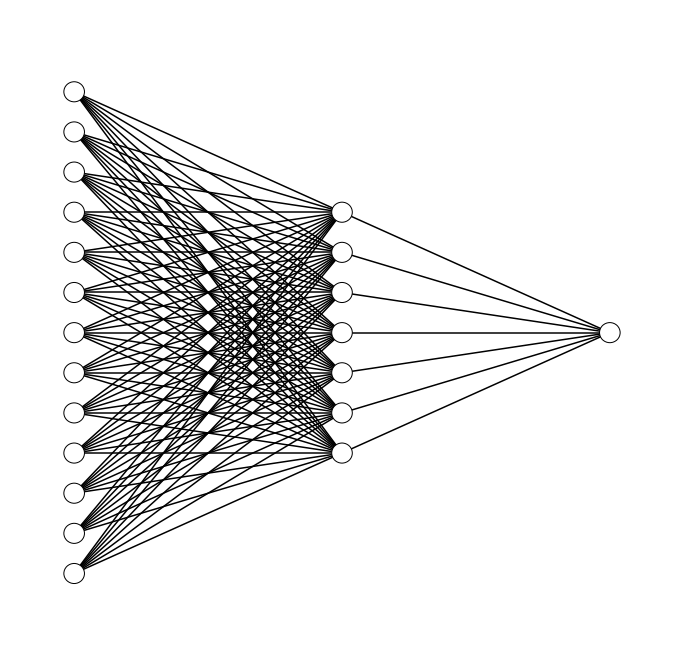

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [13, 7, 1])

#### 
**THE SIGMOID FUNCTION**

The sigmoid activation function squashes the input values between 0 and 1. This provides a consistant way for the network to deal with outputs.


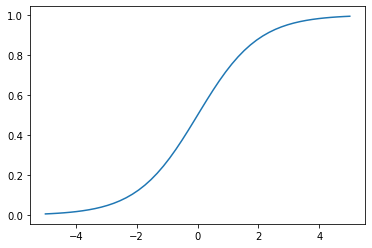

In [14]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

####
#### **TRAINING**
####

In [15]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use square as well
    er = (abs(y - l2)).mean()
    error.append(er)
    
    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    
print('Error at the 1000th epoch:', er)    

Error at the 1000th epoch: 0.12285227103529757


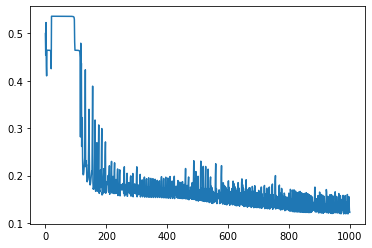

In [16]:
plt.plot(error)

####
#### **TEST THE NETWORK FOR ACCURACY**
####

In [17]:
X = test.values[:,:13]
y = np.array([targets[int(x)] for x in test.values[:,13:14]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

l22 = np.round(l2)

From the above maxtrix we take the maximum value (per row), which forms our predictions...

In [18]:
yp = np.argmax(l22, axis=1) # y_pred value

In [19]:
len(yp)

51

In [20]:
len(l22)

51

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(yp, l22)

0.7843137254901961

/Users/geethika/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

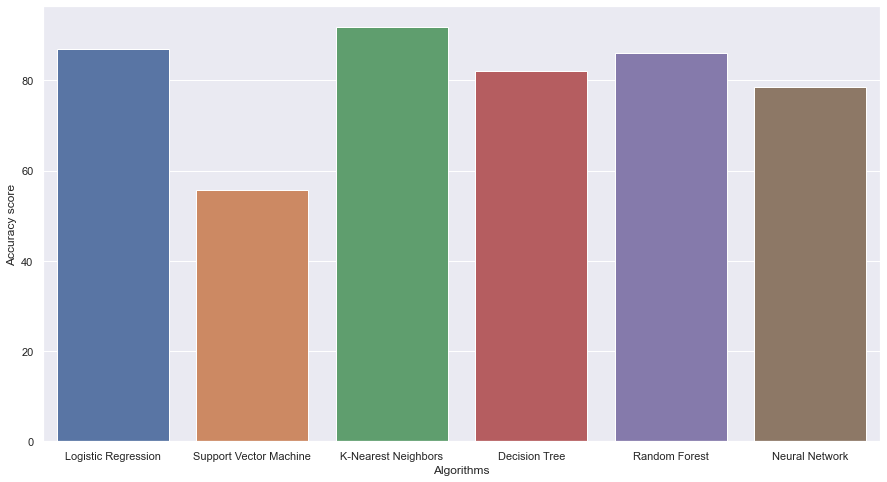

In [24]:
import seaborn as sns # visualization
import matplotlib.pyplot as plt
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Neural Network"]
scores=[86.88,55.73,91.8,81.96,86,78.4]
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)